In [1]:
from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xmin = 0.0
ymin = 0.0
zmin = 0.0
xmax = 2.0
ymax = 2.0
zmax = 2.0

nresol_x = 200
nresol_y = 200
nresol_z = 400
nf_max = 200

pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02

# Height profile f parameters
a = 0.48
alpha = 0.3
b = 1.0

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.02
a_low = a * (1 - np.tanh(-z0_b / deltaz_b))
kappa = -np.log(a/a_low)/z0_b
kappa = 1/z0_b

length_scale = 1.0
length_scale_x = 1.0 * nresol_x * float(pixelsize_x)
length_scale_y = 1.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

In [3]:
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

print(p_arr[20, 20])
print(q_arr[20, 20])

p_arr_low = 2.0 / kappa * np.sqrt(k2_arr - alpha**2)
q_arr_low = 2.0 / kappa * np.sqrt(k2_arr * a_low)

print(p_arr_low[20, 20])
print(q_arr_low[20, 20])

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

0.08880700153068728
0.44427816514182555
17.77112660567302
17.412473878703597


In [4]:
phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
phi_exp = np.zeros((nresol_y, nresol_x, nresol_z))

dphidz_exp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0_b, deltaz_b)
            phi_exp[iy, ix, iz] = phi_low(z, p_low, q_low, kappa)

            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0_b, deltaz_b)
            dphidz_exp[iy, ix, iz] = dphidz_low(z, p_low, q_low, kappa)

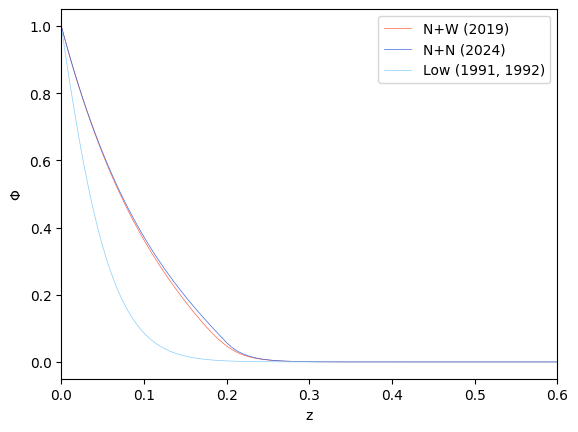

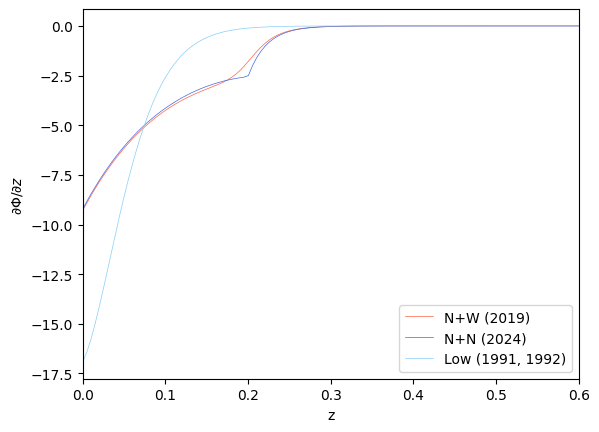

In [5]:
phi_hyper_test = 0.0 * z_arr
phi_asymp_test = 0.0 * z_arr
phi_exp_test = 0.0 * z_arr
dphidz_hyper_test = 0.0 * z_arr
dphidz_asymp_test = 0.0 * z_arr
dphidz_exp_test = 0.0 * z_arr

p = 0.08880700153068728
q = 0.44427816514182555
p_low = 17.77112660567302
q_low = 17.412473878703597

for iz in range(nresol_z):
    z = z_arr[iz]
    phi_hyper_test[iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
    phi_asymp_test[iz] = phi(z, p, q, z0_b, deltaz_b)
    phi_exp_test[iz] = phi_low(z, p_low, q_low, kappa)

    dphidz_hyper_test[iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
    dphidz_asymp_test[iz] = dphidz(z, p, q, z0_b, deltaz_b)
    dphidz_exp_test[iz] = dphidz_low(z, p_low, q_low, kappa)

plt.plot(z_arr, phi_hyper_test, linewidth=0.5, color="tomato", label="N+W (2019)")
plt.plot(z_arr, phi_asymp_test, linewidth=0.5, color="royalblue", label="N+N (2024)")
plt.plot(
    z_arr, phi_exp_test, linewidth=0.5, color="lightskyblue", label="Low (1991, 1992)"
)
plt.xlim([0, 3 * z0])
plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi.png"
plt.savefig(plotname, dpi=300)
plt.show()


plt.plot(z_arr, dphidz_hyper_test, linewidth=0.5, color="tomato", label="N+W (2019)")
plt.plot(z_arr, dphidz_asymp_test, linewidth=0.5, color="royalblue", label="N+N (2024)")
plt.plot(
    z_arr,
    dphidz_exp_test,
    linewidth=0.5,
    color="lightskyblue",
    label="Low (1991, 1992)",
)
plt.xlim([0, 3 * z0])
plt.legend()
plt.xlabel("z")
plt.ylabel("$\partial \Phi / \partial z$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphidz.png"
plt.savefig(plotname, dpi=300)
plt.show()

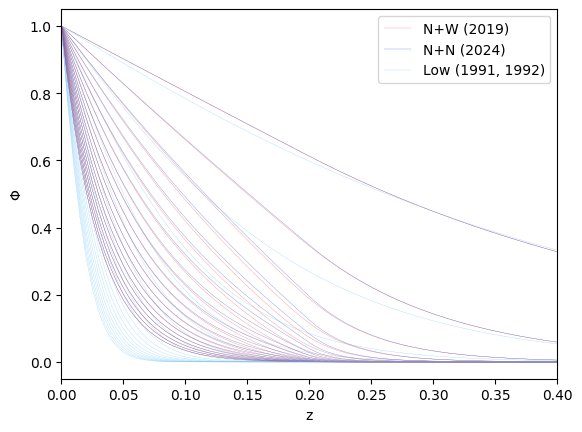

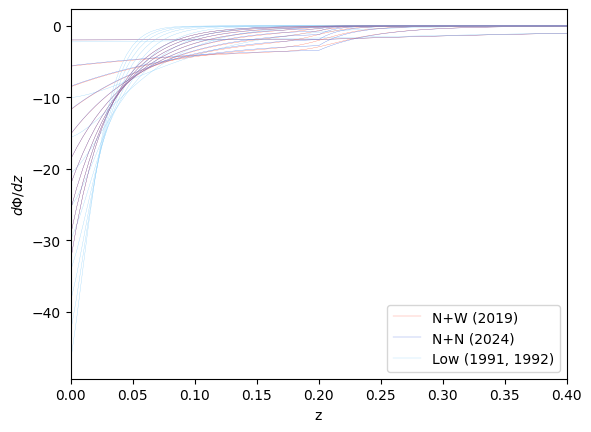

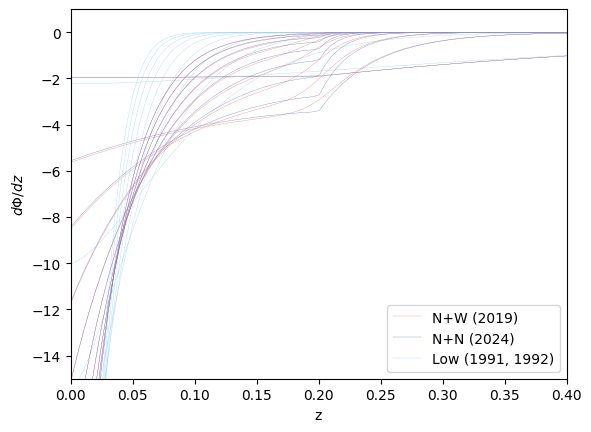

In [6]:
plt.plot(
    z_arr, phi_hyper[0, 0, :], linewidth=0.2, color="tomato", label="N+W (2019)"
)
plt.plot(
    z_arr,
    phi_asymp[0, 0, :],
    linewidth=0.2,
    color="royalblue",
    label="N+N (2024)",
)
plt.plot(
    z_arr,
    phi_exp[0, 0, :],
    linewidth=0.2,
    color="lightskyblue",
    label="Low (1991, 1992)",
)
for ix in range(4, 80, 4):
    plt.plot(
        z_arr, phi_hyper[ix, ix, :], linewidth=0.2, color="tomato", 
        #label="N+W (2019)"
    )
    plt.plot(
        z_arr,
        phi_asymp[ix, ix, :],
        linewidth=0.2,
        color="royalblue",
        #label="N+N (2024)",
    )
    plt.plot(
        z_arr,
        phi_exp[ix, ix, :],
        linewidth=0.2,
        color="lightskyblue",
        #label="Low (1991, 1992)",
    )
plt.xlim([0, 2 * z0])
plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_faecher.png"
plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    dphidz_hyper[0, 0, :],
    linewidth=0.2,
    color="tomato",
    label="N+W (2019)",
)
plt.plot(
    z_arr,
    dphidz_asymp[0, 0, :],
    linewidth=0.2,
    color="royalblue",
    label="N+N (2024)",
)
plt.plot(
    z_arr,
    dphidz_exp[0, 0, :],
    linewidth=0.2,
    color="lightskyblue",
    label="Low (1991, 1992)",
)
for ix in range(10, 80, 8):
    plt.plot(
        z_arr,
        dphidz_hyper[ix, ix, :],
        linewidth=0.2,
        color="tomato",
        #label="N+W (2019)",
    )
    plt.plot(
        z_arr,
        dphidz_asymp[ix, ix, :],
        linewidth=0.2,
        color="royalblue",
        #label="N+N (2024)",
    )
    plt.plot(
        z_arr,
        dphidz_exp[ix, ix, :],
        linewidth=0.2,
        color="lightskyblue",
        #label="Low (1991, 1992)",
    )
plt.xlim([0, 2*z0])
plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphidz_faecher.png"
plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    dphidz_hyper[0, 0, :],
    linewidth=0.2,
    color="tomato",
    label="N+W (2019)",
)
plt.plot(
    z_arr,
    dphidz_asymp[0, 0, :],
    linewidth=0.2,
    color="royalblue",
    label="N+N (2024)",
)
plt.plot(
    z_arr,
    dphidz_exp[0, 0, :],
    linewidth=0.2,
    color="lightskyblue",
    label="Low (1991, 1992)",
)
for ix in range(10, 80, 8):
    plt.plot(
        z_arr,
        dphidz_hyper[ix, ix, :],
        linewidth=0.2,
        color="tomato",
        #label="N+W (2019)",
    )
    plt.plot(
        z_arr,
        dphidz_asymp[ix, ix, :],
        linewidth=0.2,
        color="royalblue",
        #label="N+N (2024)",
    )
    plt.plot(
        z_arr,
        dphidz_exp[ix, ix, :],
        linewidth=0.2,
        color="lightskyblue",
        #label="Low (1991, 1992)",
    )
plt.xlim([0, 2*z0])
plt.ylim([-15, 1.0])
plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
#plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphidz_faecher2.png"
#plt.savefig(plotname, dpi=300)
plt.show()

In [7]:
a = 0.44
alpha = 0.25
b = 1.0

phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0_b, deltaz_b)

            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0_b, deltaz_b)

0.008152688920530171


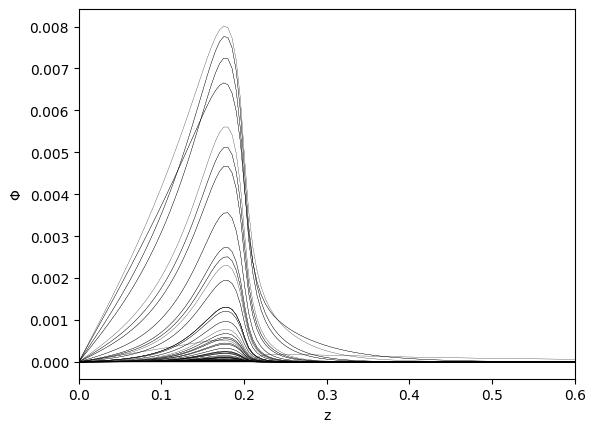

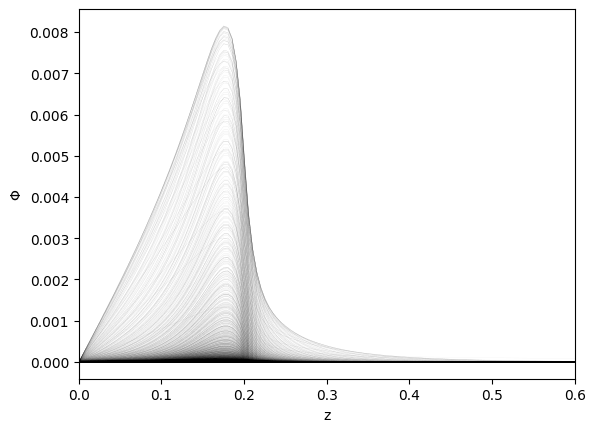

0.32542269926697887


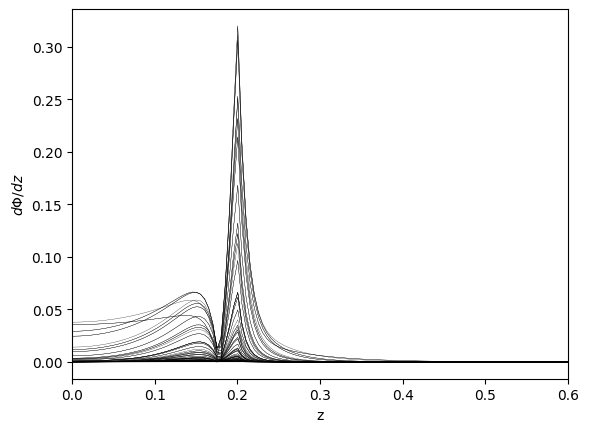

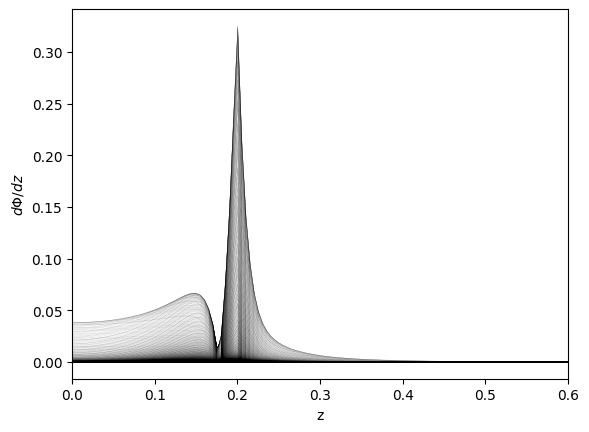

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/2415293712.py:79: RuntimeWarning: divide by zero encountered in divide
  abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])
/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/2415293712.py:79: RuntimeWarning: invalid value encountered in divide
  abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])


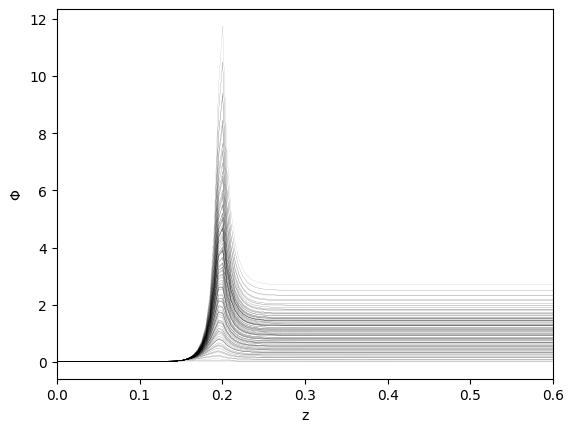

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/2415293712.py:96: RuntimeWarning: divide by zero encountered in divide
  abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])
/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/2415293712.py:96: RuntimeWarning: invalid value encountered in divide
  abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])


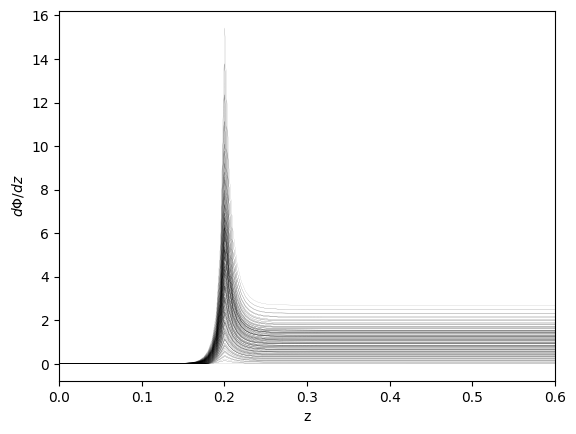

In [8]:
maxval = abs(phi_hyper[:, :, :] - phi_asymp[:, :, :])

print(maxval.max())
    
for ix in range(0, int(nresol_x / 2), 10):
    for iy in range(0, int(nresol_y / 2), 10):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.2,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_mhs2_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(1, nresol_x, 2):
    for iy in range(1, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_mhs2_2.png"
plt.savefig(plotname, dpi=300)
plt.show()

maxval = abs(dphidz_hyper[:, :, :] - dphidz_asymp[:, :, :])

print(maxval.max())

for ix in range(0, int(nresol_x / 2), 10):
    for iy in range(0, int(nresol_y / 2), 10):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.2,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_mhs2_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 2):
    for iy in range(0, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_mhs2_2.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 15):
    for iy in range(0, nresol_y, 15):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])
            / abs(phi_hyper[iy, ix, :]),
            linewidth=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_relerr_mhs2.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 15):
    for iy in range(0, nresol_y, 15):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])
            / abs(dphidz_hyper[iy, ix, :]),
            linewidth=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_relerr_mhs2.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [9]:
a = 0.22
alpha = 0.25
b = 1.0

phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0_b, deltaz_b)

            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0_b, deltaz_b)

0.0012015527420719263


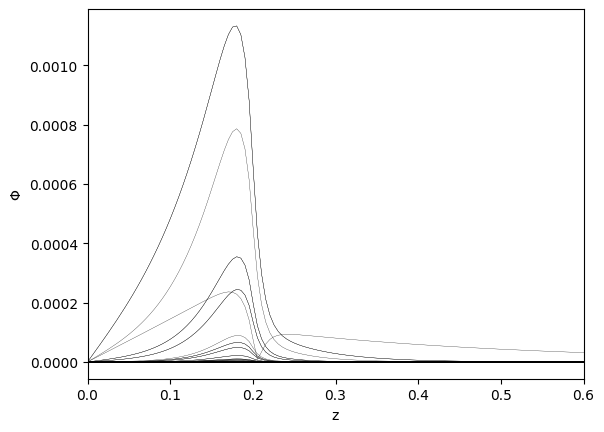

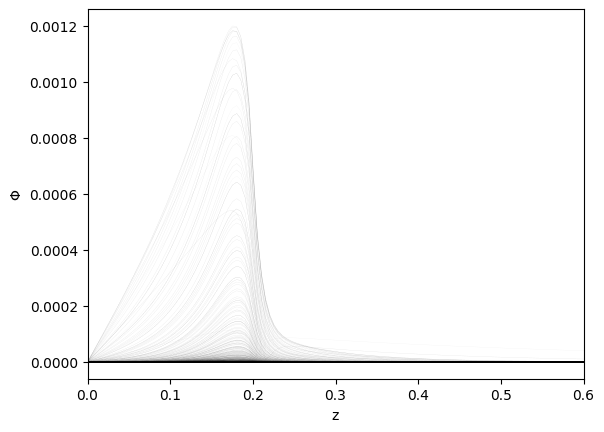

0.05490785370057094


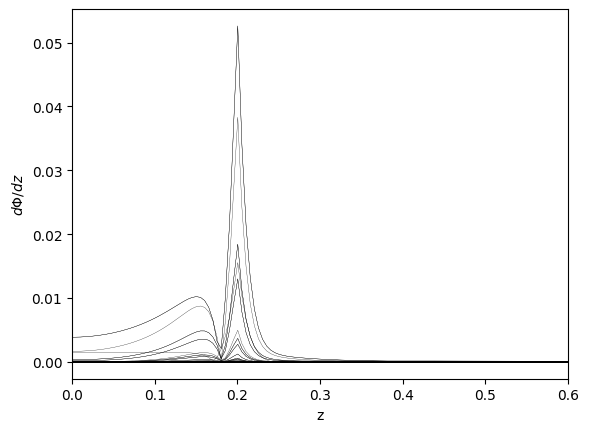

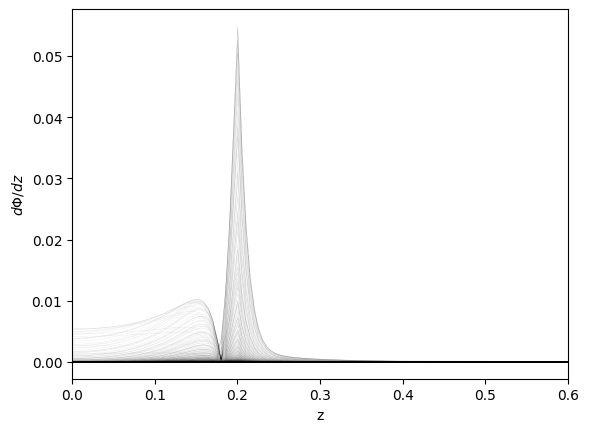

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/4074498376.py:79: RuntimeWarning: invalid value encountered in divide
  abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])


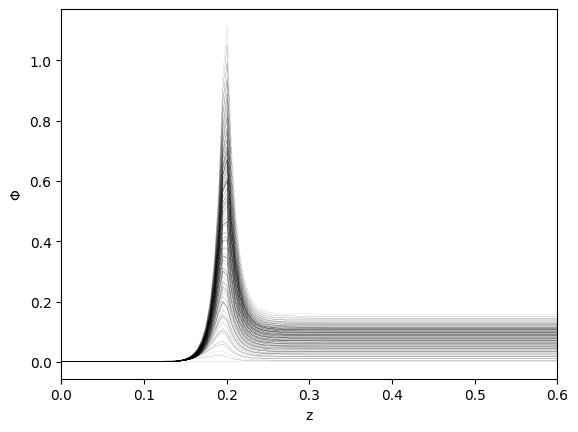

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/4074498376.py:96: RuntimeWarning: invalid value encountered in divide
  abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])


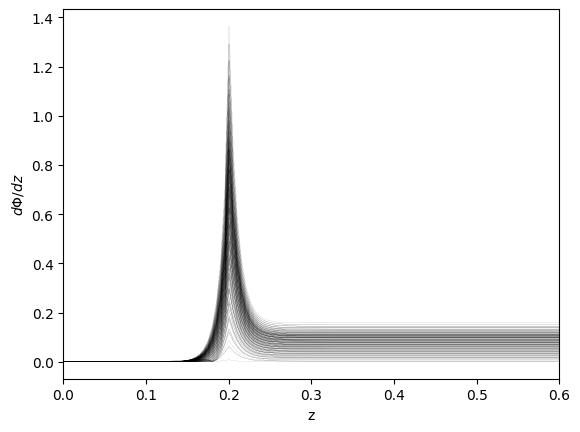

In [10]:
maxval = abs(phi_hyper[:, :, :] - phi_asymp[:, :, :])

print(maxval.max())
    
for ix in range(0, int(nresol_x / 2), 10):
    for iy in range(0, int(nresol_y / 2), 10):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.2,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_mhs1_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(1, nresol_x, 2):
    for iy in range(1, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_mhs1_2.png"
plt.savefig(plotname, dpi=300)
plt.show()

maxval = abs(dphidz_hyper[:, :, :] - dphidz_asymp[:, :, :])

print(maxval.max())

for ix in range(0, int(nresol_x / 2), 10):
    for iy in range(0, int(nresol_y / 2), 10):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.2,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_mhs1_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 2):
    for iy in range(0, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_mhs1_2.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 15):
    for iy in range(0, nresol_y, 15):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])
            / abs(phi_hyper[iy, ix, :]),
            linewidth=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_relerr_mhs1.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 15):
    for iy in range(0, nresol_y, 15):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])
            / abs(dphidz_hyper[iy, ix, :]),
            linewidth=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_relerr_mhs1.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [11]:
a = 0.0
alpha = 0.25
b = 1.0

phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0_b, deltaz_b)

            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0_b, deltaz_b)

3.2751579226442118e-15


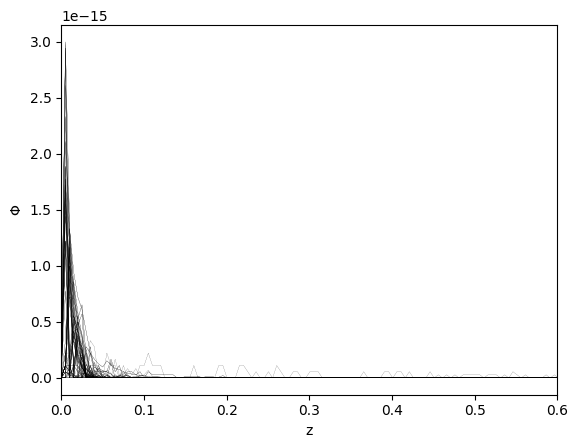

9.521272659185342e-13


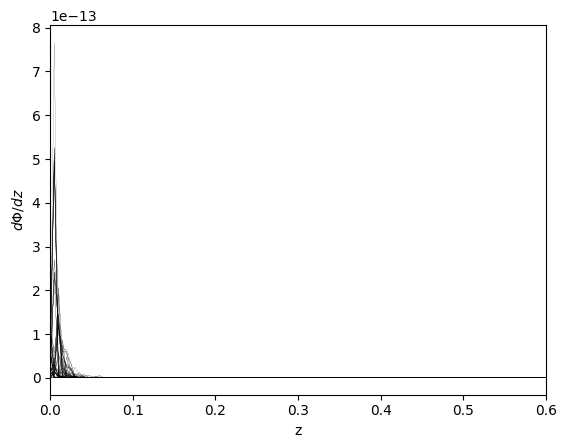

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/2983607576.py:79: RuntimeWarning: invalid value encountered in divide
  abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])


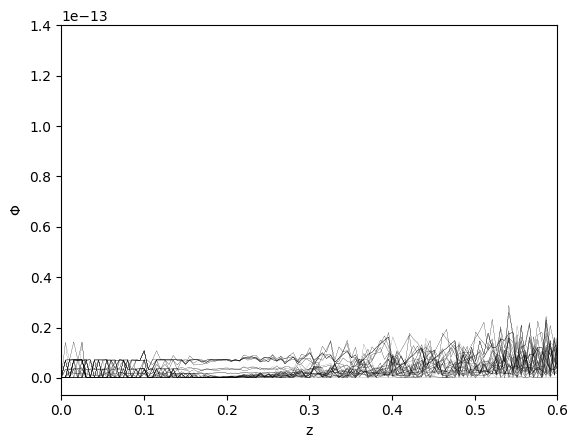

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/2983607576.py:96: RuntimeWarning: invalid value encountered in divide
  abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])


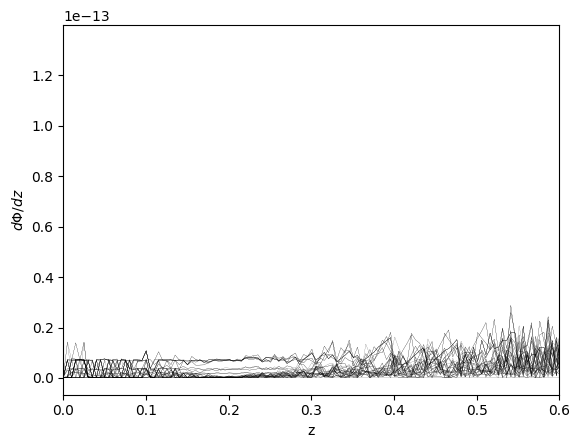

In [12]:
maxval = abs(phi_hyper[:, :, :] - phi_asymp[:, :, :])

print(maxval.max())
    
for ix in range(0, int(nresol_x / 2), 10):
    for iy in range(0, int(nresol_y / 2), 10):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_lff_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

"""for ix in range(1, nresol_x, 2):
    for iy in range(1, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_lff_2.png"
plt.savefig(plotname, dpi=300)
plt.show()"""

maxval = abs(dphidz_hyper[:, :, :] - dphidz_asymp[:, :, :])

print(maxval.max())

for ix in range(0, nresol_x, 20):
    for iy in range(0, nresol_y, 20):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_lff_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

"""for ix in range(0, nresol_x, 2):
    for iy in range(0, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_lff_2.png"
plt.savefig(plotname, dpi=300)
plt.show()"""

for ix in range(0, nresol_x, 30):
    for iy in range(0, nresol_y, 30):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])
            / abs(phi_hyper[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_relerr_lff.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 30):
    for iy in range(0, nresol_y, 30):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])
            / abs(dphidz_hyper[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_relerr_lff.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [13]:
a = 0.0
alpha = 0.0
b = 1.0

phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0_b, deltaz_b)

            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0_b, deltaz_b)

3.2751579226442118e-15


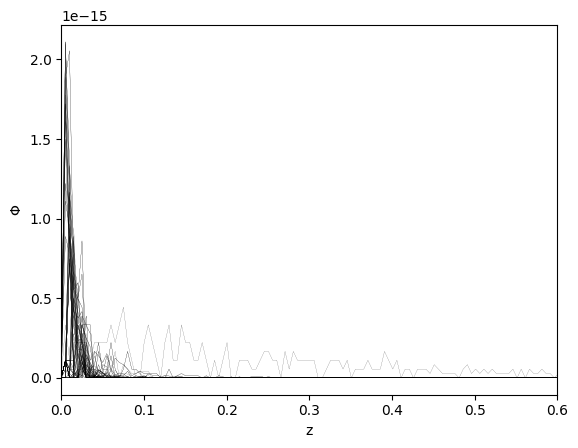

9.379164112033322e-13


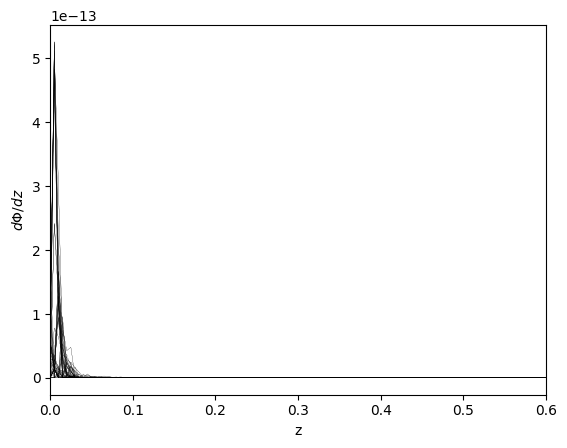

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/1425533394.py:79: RuntimeWarning: invalid value encountered in divide
  abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])


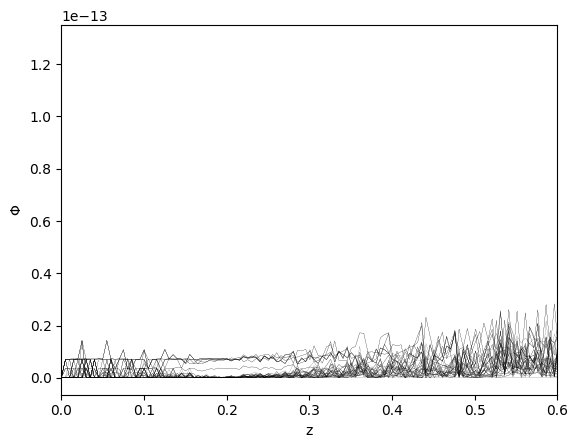

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6109/1425533394.py:96: RuntimeWarning: invalid value encountered in divide
  abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])


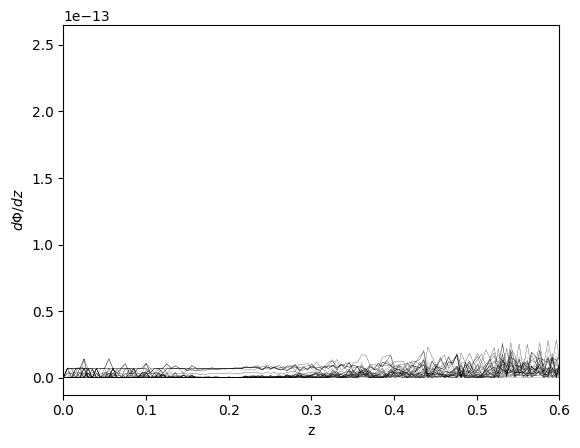

In [14]:
maxval = abs(phi_hyper[:, :, :] - phi_asymp[:, :, :])

print(maxval.max())
    
for ix in range(0, int(nresol_x / 2), 10):
    for iy in range(0, int(nresol_y / 2), 10):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_pot_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

"""for ix in range(1, nresol_x, 2):
    for iy in range(1, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_abserr_pot_2.png"
plt.savefig(plotname, dpi=300)
plt.show()"""

maxval = abs(dphidz_hyper[:, :, :] - dphidz_asymp[:, :, :])

print(maxval.max())

for ix in range(0, nresol_x, 20):
    for iy in range(0, nresol_y, 20):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_pot_1.png"
plt.savefig(plotname, dpi=300)
plt.show()

"""for ix in range(0, nresol_x, 2):
    for iy in range(0, nresol_y, 2):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :]),
            linewidth=0.2,
            alpha=0.05,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_abserr_pot_2.png"
plt.savefig(plotname, dpi=300)
plt.show()"""

for ix in range(0, nresol_x, 30):
    for iy in range(0, nresol_y, 30):
        plt.plot(
            z_arr,
            abs(phi_hyper[iy, ix, :] - phi_asymp[iy, ix, :])
            / abs(phi_hyper[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$\Phi$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/phi_relerr_pot.png"
plt.savefig(plotname, dpi=300)
plt.show()

for ix in range(0, nresol_x, 30):
    for iy in range(0, nresol_y, 30):
        plt.plot(
            z_arr,
            abs(dphidz_hyper[iy, ix, :] - dphidz_asymp[iy, ix, :])
            / abs(dphidz_hyper[iy, ix, :]),
            linewidth=0.1,
            color="black",
        )
plt.xlim([0, 3 * z0])
# plt.legend()
plt.xlabel("z")
plt.ylabel("$d \Phi / dz$")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/dphi_relerr_pot.png"
plt.savefig(plotname, dpi=300)
plt.show()